In [224]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.display import display, HTML
import time


In [405]:
df_res= pd.read_csv(r"C:\Users\pranay\Downloads\zomato_data.csv")
df_lat= pd.read_csv(r"C:\Users\pranay\Downloads\Geographical Coordinates.csv")

In [407]:
df_res.shape

(51717, 10)

In [409]:
df_res.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')

In [411]:
df_res['rate'] = (
    df_res['rate']
    .astype(str)                     
    .str.replace(' /5', '', regex=False)  
    .str.replace('/5', '', regex=False)   
    .str.replace(',', '', regex=False)    
    .replace('-', np.nan)               
)

df_res['rate'] = pd.to_numeric(df_res['rate'], errors='coerce')

In [413]:

df_res['rate'] = df_res['rate'].fillna(df_res['rate'].median())  

df_res['rate'] = df_res['rate'].astype(float)


In [415]:
df_res['approx_costfor_two_people']=df_res['approx_costfor_two_people'].str.replace(',','')

In [417]:
df_res['approx_costfor_two_people']= pd.to_numeric(df_res['approx_costfor_two_people'])

In [419]:
df_res['approx_costfor_two_people']=df_res['approx_costfor_two_people'].fillna(df_res['approx_costfor_two_people'].median())

In [421]:
df_res['dish_liked']=df_res['dish_liked'].replace(np.nan,"Not Available")

In [423]:
df_res['cuisines']=df_res['cuisines'].replace(np.nan,"Other")

In [425]:
df_res['rest_type']=df_res['rest_type'].replace(np.nan,"Unknown")

In [427]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [581]:
df_res=pd.merge(df_res, df_lat, on='listed_incity', how='left')
df_res.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude_x,Longitude_x,Latitude_y,Longitude_y,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,12.939333,77.553982,12.939333,77.553982,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,12.939333,77.553982,12.939333,77.553982,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,12.939333,77.553982,12.939333,77.553982,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,12.939333,77.553982,12.939333,77.553982,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,12.939333,77.553982,12.939333,77.553982,12.939333,77.553982


In [610]:
df_res.dropna(inplace=True)

In [612]:
df_res.isna().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
Latitude_x                   0
Longitude_x                  0
Latitude_y                   0
Longitude_y                  0
Latitude                     0
Longitude                    0
dtype: int64

# Exploratory Data Analysis

In [645]:
top_areas = df_res['listed_incity'].value_counts().head(10)

C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\147764836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette="viridis")


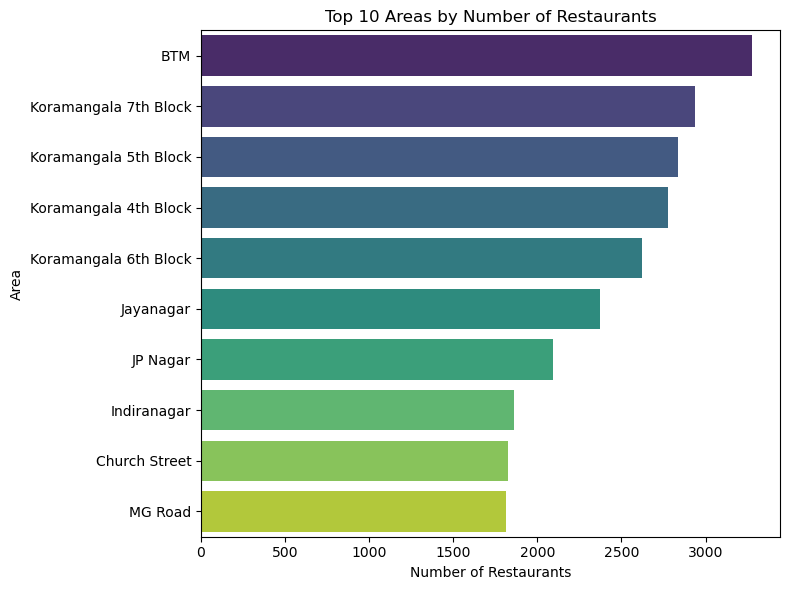

In [653]:

plt.figure(figsize=(8, 6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette="viridis")
plt.title("Top 10 Areas by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Area")
plt.tight_layout()
plt.show()


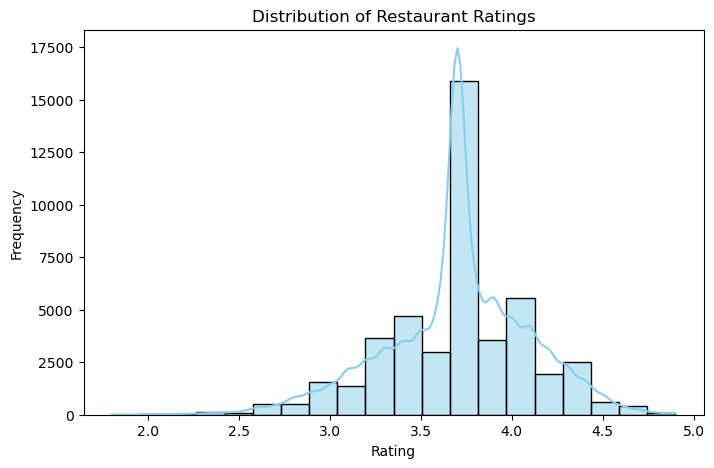

In [649]:
plt.figure(figsize=(8, 5))
sns.histplot(df_res['rate'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

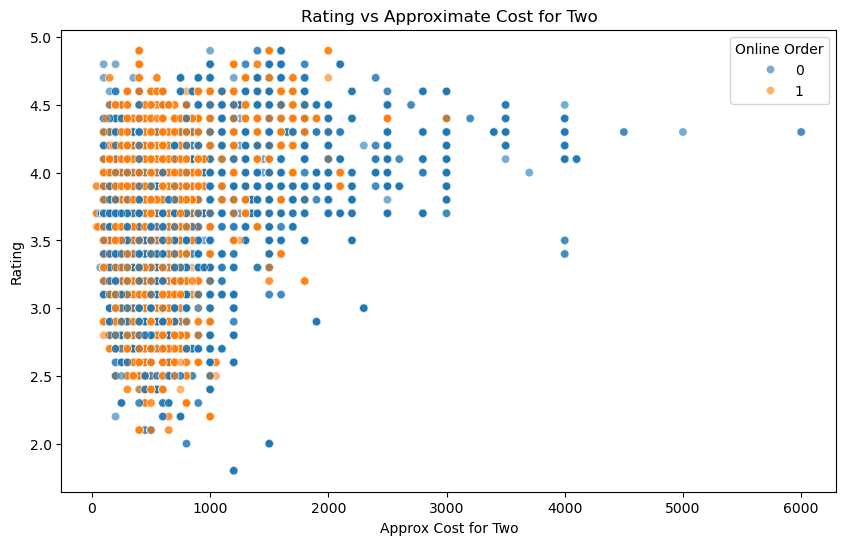

In [655]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_res,
    x='approx_costfor_two_people',
    y='rate',
    hue='online_order',
    alpha=0.6
)
plt.title("Rating vs Approximate Cost for Two")
plt.xlabel("Approx Cost for Two")
plt.ylabel("Rating")
plt.legend(title="Online Order")
plt.show()

C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\2594893109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rest_types.index, x=top_rest_types.values, palette='magma')


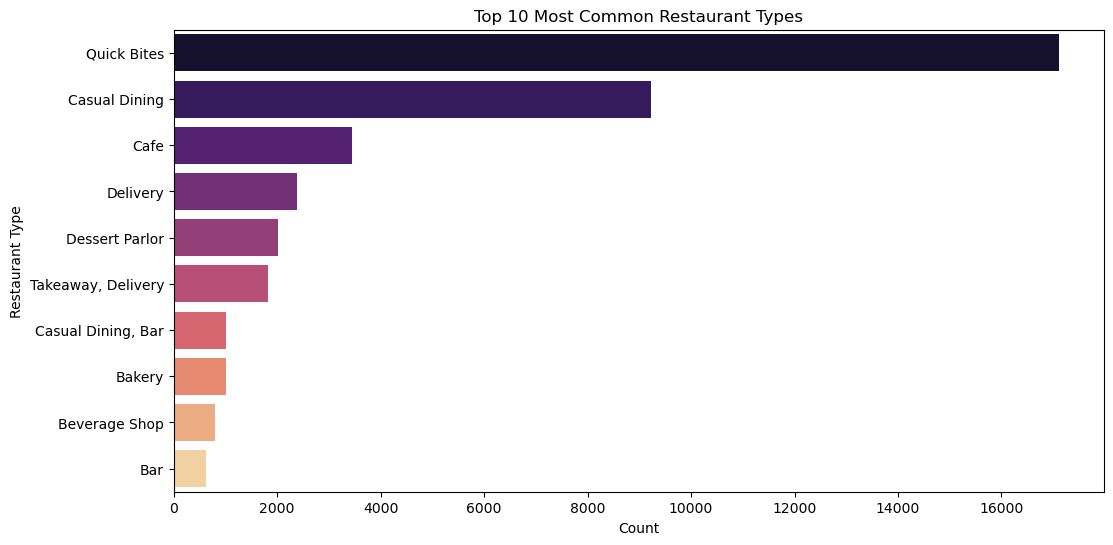

In [657]:
plt.figure(figsize=(12, 6))
top_rest_types = df_res['rest_type'].value_counts().head(10)
sns.barplot(y=top_rest_types.index, x=top_rest_types.values, palette='magma')
plt.title("Top 10 Most Common Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.show()

C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\4257222516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_res, x='online_order', palette='cool')


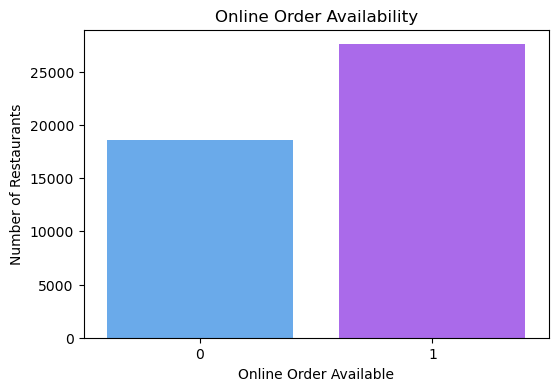

In [659]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_res, x='online_order', palette='cool')
plt.title("Online Order Availability")
plt.xlabel("Online Order Available")
plt.ylabel("Number of Restaurants")
plt.show()

In [698]:
top_rest_types = df_res['rest_type'].value_counts().head(10)

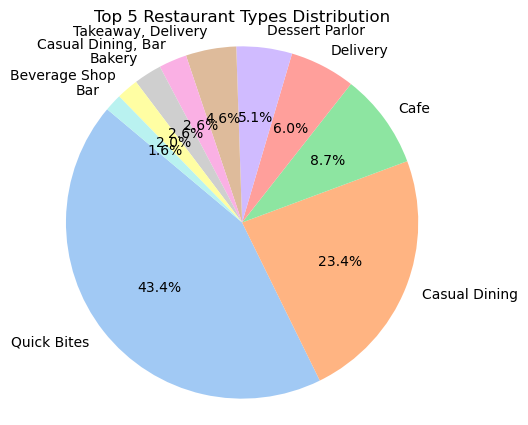

In [704]:
plt.figure(figsize=(5,5))
plt.pie(top_rest_types.values, labels=top_rest_types.index, autopct='%0.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 5 Restaurant Types Distribution")
plt.axis('equal')
plt.show()

In [708]:
votes_by_area =df_res.groupby('listed_incity')['votes'].sum().sort_values(ascending=False).head(10)

C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\2713570369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=votes_by_area.values, y=votes_by_area.index, palette="rocket")


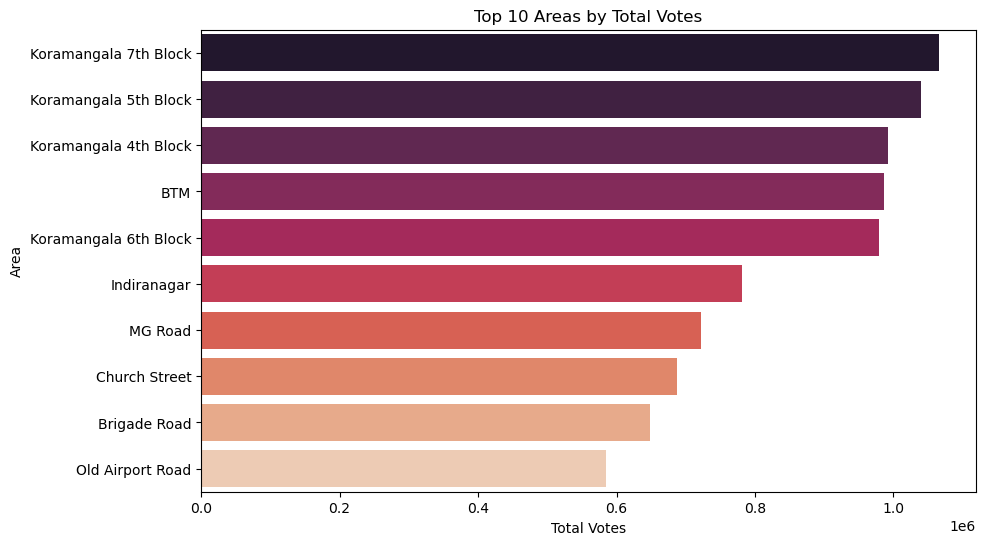

In [710]:
plt.figure(figsize=(10, 6))
sns.barplot(x=votes_by_area.values, y=votes_by_area.index, palette="rocket")
plt.title("Top 10 Areas by Total Votes")
plt.xlabel("Total Votes")
plt.ylabel("Area")
plt.show()

In [716]:
top_types = df_res['rest_type'].value_counts().head(10).index
avg_rating_by_type = df_res[df_res['rest_type'].isin(top_types)].groupby('rest_type')['rate'].mean().sort_values()

C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\1563496995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_type.values, y=avg_rating_by_type.index, palette='coolwarm')


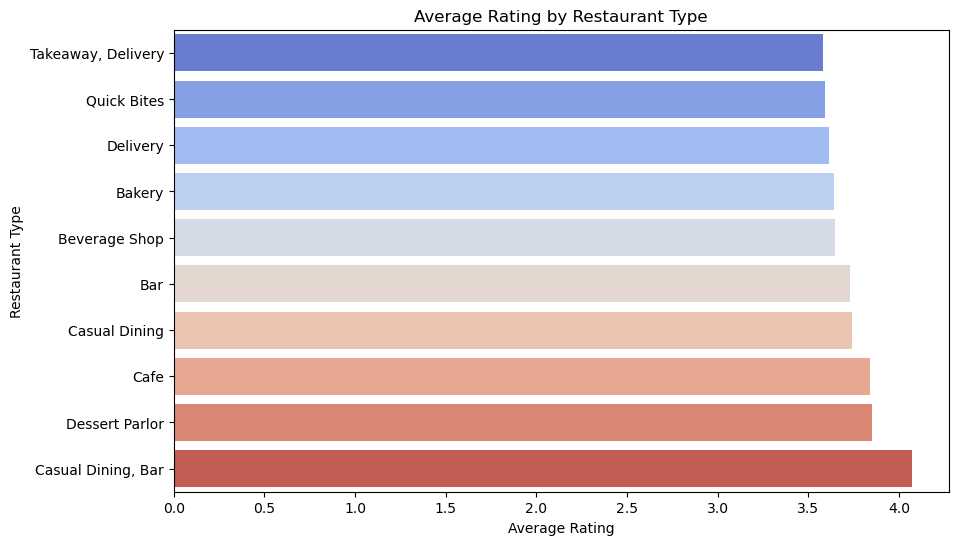

In [718]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_type.values, y=avg_rating_by_type.index, palette='coolwarm')
plt.title("Average Rating by Restaurant Type")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Type")
plt.show()

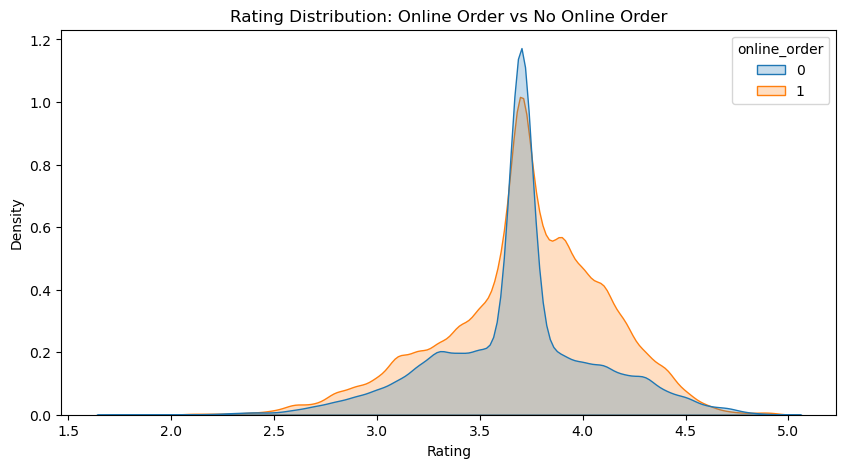

In [720]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_res, x='rate', hue='online_order', fill=True)
plt.title("Rating Distribution: Online Order vs No Online Order")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\2697675589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_res,y=df_res['listed_intype'],palette='viridis')


Text(0.5, 1.0, 'count of listed_intypes')

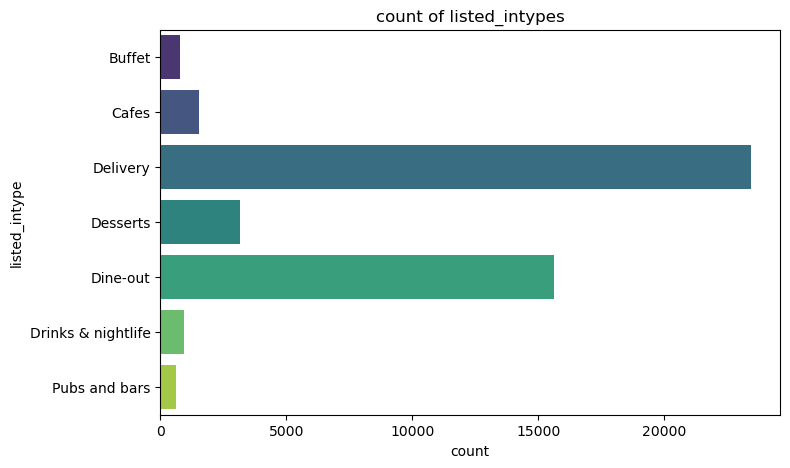

In [761]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_res,y=df_res['listed_intype'],palette='viridis')
plt.title('count of listed_intypes')

# Geospatial Visualization 


In [592]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [593]:
pip install Ipython

Note: you may need to restart the kernel to use updated packages.


In [598]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame


In [614]:
italian_df= df_res[df_res['cuisines'].str.contains('Italian',na=False)]
map1=folium.Map(location=[12.9716,77.5946],zoom_start=12)

for i,row in italian_df.iterrows():
    folium.Marker(
        location=[row['Latitude'],row['Longitude']],
        popup=f"{row['listed_incity']}<br>Cuisine:{row['cuisines']}",
        icon=folium.Icon(color='purple')
        ).add_to(map1)

map1.save('italian_spots_map.html')

In [619]:
from IPython.display import IFrame

In [786]:
IFrame('italian_spots_map.html',width=600,height=500)

In [627]:
map2=folium.Map(location=[12.9716,77.5946],zoom_start=12)
marker_cluster=MarkerCluster().add_to(map2)

for i,row in italian_df.iterrows():
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'],row['Longitude']],
            popup=f"{row['listed_incity']}<br>Rating:{row['rate']}<br>Cost:₹{row['approx_costfor_two_people']}",
            ).add_to(marker_cluster)

map2.save('restaurent_density.html')

In [635]:
IFrame('restaurent_density.html',width=600,height=500)

# Mcq's

In [429]:
df_res['online_order'] = df_res['online_order'].replace({'Yes': 1, 'No': 0})
df_res['book_table'] = df_res['book_table'].replace({'Yes': 1, 'No': 0})

C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\4233916800.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_res['online_order'] = df_res['online_order'].replace({'Yes': 1, 'No': 0})
C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\4233916800.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_res['book_table'] = df_res['book_table'].replace({'Yes': 1, 'No': 0})


In [431]:
df_res['online_order'].value_counts()

online_order
1    30444
0    21273
Name: count, dtype: int64

In [433]:
df_res['book_table'].value_counts()

book_table
0    45268
1     6449
Name: count, dtype: int64

In [435]:
df_res['approx_costfor_two_people'].astype(int)

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_costfor_two_people, Length: 51717, dtype: int32

In [437]:
df_res['votes'].astype(int)

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int32

## 2nd question and 3rd question:
 2.How many restaurants serve North Indian cuisine?<br>
 3. What cuisine is most commonly offered by restaurants in Bangalore?
**

In [244]:
df_res['cuisines']=df_res['cuisines'].str.split(",")

In [245]:
df_res['cuisines']

0                [North Indian,  Mughlai,  Chinese]
1                   [Chinese,  North Indian,  Thai]
2                        [Cafe,  Mexican,  Italian]
3                     [South Indian,  North Indian]
4                       [North Indian,  Rajasthani]
                            ...                    
51712                                 [Continental]
51713                                 [Finger Food]
51714                                 [Finger Food]
51715                                 [Finger Food]
51716    [Finger Food,  North Indian,  Continental]
Name: cuisines, Length: 51717, dtype: object

In [269]:

df_res = df_res.explode(column = 'cuisines')

In [275]:
df_res['cuisines'].value_counts()

cuisines
 Chinese         12481
North Indian     12299
 North Indian     8786
 Fast Food        5504
South Indian      5010
                 ...  
 Belgian             3
 Malwani             2
 Indian              2
Belgian              1
Singaporean          1
Name: count, Length: 191, dtype: int64

In [277]:
12299+8786

21085

# 4th question
Which locality in Bangalore has the highest average cost for dining (for two people)?

In [441]:
df_res.groupby(df_res['listed_incity'])['approx_costfor_two_people'].mean().sort_values(ascending=True)

listed_incity
Banashankari             401.551564
Basavanagudi             445.101896
Bannerghatta Road        452.436611
New BEL Road             456.418919
JP Nagar                 459.546756
Jayanagar                468.814846
Kammanahalli             470.127916
Kalyan Nagar             479.144385
Rajajinagar              485.078777
HSR                      487.461229
BTM                      495.077463
Electronic City          496.639544
Marathahalli             497.462327
Koramangala 7th Block    519.513274
Koramangala 6th Block    520.091498
Brookefield              521.086957
Koramangala 5th Block    521.981664
Koramangala 4th Block    527.106873
Sarjapur Road            540.412371
Bellandur                550.236349
Frazer Town              557.569620
Malleshwaram             574.470803
Whitefield               577.722222
Old Airport Road         605.698246
Indiranagar              652.973118
Residency Road           739.573457
Lavelle Road             751.151950
MG Road       

## 5th question
Which restaurant type has the top rating with over 1000 votes?

In [443]:
df_votes=df_res[df_res['votes']>1000]

In [539]:
df_votes.groupby(df_votes['rest_type'])['rate'].max()

rest_type
Bakery                         4.8
Bakery, Cafe                   4.4
Bar                            4.8
Bar, Casual Dining             4.6
Bar, Quick Bites               4.0
Cafe                           4.6
Cafe, Bakery                   4.4
Cafe, Casual Dining            4.7
Cafe, Dessert Parlor           4.7
Casual Dining                  4.9
Casual Dining, Bar             4.9
Casual Dining, Cafe            4.6
Casual Dining, Irani Cafee     4.5
Casual Dining, Microbrewery    4.5
Casual Dining, Pub             4.6
Club                           4.1
Delivery                       4.6
Dessert Parlor                 4.9
Dessert Parlor, Cafe           4.6
Fine Dining                    4.6
Fine Dining, Lounge            4.4
Lounge                         4.6
Lounge, Cafe                   4.0
Lounge, Casual Dining          4.3
Lounge, Microbrewery           3.8
Microbrewery                   4.9
Microbrewery, Bar              4.5
Microbrewery, Casual Dining    4.7
Microbrewe

# 6th question

6.How much does it cost at minimum to eat out in Bangalore?


In [447]:
df_res.groupby(df_res['listed_intype'])['approx_costfor_two_people'].min()

listed_intype
Buffet                300.0
Cafes                  50.0
Delivery               40.0
Desserts               50.0
Dine-out               40.0
Drinks & nightlife    150.0
Pubs and bars         150.0
Name: approx_costfor_two_people, dtype: float64

# 7th question
What percentage of total online orders is received by restaurants in Banashankari?

In [449]:
df_bhaskari = df_res[df_res['listed_incity']=='Banashankari']

In [451]:
df_bhaskari['online_order'].value_counts(normalize=True)*100

online_order
1    63.267671
0    36.732329
Name: proportion, dtype: float64

# 8th question
Which locality has the most restaurants with over 500 votes and a rating below 3.0?

In [453]:
df_rate_3=df_res[(df_res['votes']>500)&(df_res['rate']<3.0)]

In [455]:
df_rate_3['listed_incity'].value_counts()

listed_incity
Brookefield              8
Whitefield               6
Indiranagar              4
Old Airport Road         4
Bellandur                3
Marathahalli             3
Banashankari             2
Koramangala 4th Block    2
Koramangala 5th Block    2
Koramangala 6th Block    2
Koramangala 7th Block    2
Sarjapur Road            2
HSR                      1
Kalyan Nagar             1
Kammanahalli             1
Name: count, dtype: int64

# 9th question
Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [457]:
df_res.groupby(['listed_incity'])['listed_intype'].value_counts()

listed_incity  listed_intype     
BTM            Delivery              1794
               Dine-out              1053
               Desserts               196
               Cafes                  100
               Pubs and bars           52
                                     ... 
Whitefield     Dine-out               611
               Desserts               112
               Cafes                   38
               Drinks & nightlife      36
               Pubs and bars           35
Name: count, Length: 195, dtype: int64

#10th question
What's the average cost difference between buffet and delivery restaurants?

In [461]:
df_res.groupby(df_res['listed_intype'])['approx_costfor_two_people'].mean()

listed_intype
Buffet                1295.351474
Cafes                  625.159605
Delivery               464.100108
Desserts               392.323963
Dine-out               590.813319
Drinks & nightlife    1436.103542
Pubs and bars         1316.068867
Name: approx_costfor_two_people, dtype: float64

In [463]:
1295.35-464.1


831.2499999999999

# 11th question
What is the maximum number of votes received by any restaurant with online ordering?

In [465]:
df_onl=df_res[df_res['online_order']==1]

In [469]:
df_onl[['votes']].max()

votes    16832
dtype: int64

# 12th question
 What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [481]:
df_filtered = df_res[df_res['cuisines'].str.contains('Chinese') & df_res['cuisines'].str.contains('North Indian')]
average_rating = df_filtered['rate'].mean()


In [485]:
average_rating

3.5919080217658412

# 13th question
What is the most profitable area for Zomato based on potential revenue estimation?

In [527]:
zomato_cleaned = df_res[['approx_costfor_two_people', 'votes', 'listed_incity']]


In [529]:
zomato_cleaned['potential_revenue'] = zomato_cleaned['approx_costfor_two_people'] * zomato_cleaned['votes']


C:\Users\pranay\AppData\Local\Temp\ipykernel_22680\3458987777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_cleaned['potential_revenue'] = zomato_cleaned['approx_costfor_two_people'] * zomato_cleaned['votes']


In [531]:
area_revenue = zomato_cleaned.groupby('listed_incity')['potential_revenue'].sum().sort_values(ascending=False)


In [533]:
area_revenue

listed_incity
Koramangala 7th Block    1.006196e+09
Koramangala 5th Block    9.876099e+08
MG Road                  9.269693e+08
BTM                      9.246368e+08
Koramangala 4th Block    9.199229e+08
Koramangala 6th Block    9.060644e+08
Church Street            8.951474e+08
Indiranagar              8.785082e+08
Brigade Road             8.324162e+08
Residency Road           7.564552e+08
Lavelle Road             7.484017e+08
Old Airport Road         6.525770e+08
Jayanagar                4.600972e+08
Bellandur                4.164434e+08
Whitefield               4.097208e+08
Marathahalli             3.642392e+08
Sarjapur Road            3.640994e+08
JP Nagar                 3.212031e+08
HSR                      3.159223e+08
Frazer Town              2.899617e+08
Malleshwaram             2.645332e+08
Brookefield              2.631255e+08
Bannerghatta Road        1.976180e+08
Basavanagudi             1.961338e+08
Rajajinagar              1.939700e+08
Kalyan Nagar             1.412124e+0

# 14th question
If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [553]:
df_cat=df_res[df_res['rest_type'].isin(["Bakery, Beverage Shop",
"Sweet Shop, Quick Bites",
"Quick Bites",
"Fine Dining"])]

In [555]:
df_cat.groupby(df_cat['rest_type'])['rate'].mean().sort_values(ascending=True)

rest_type
Quick Bites                3.587842
Sweet Shop, Quick Bites    3.614045
Bakery, Beverage Shop      3.668750
Fine Dining                4.146243
Name: rate, dtype: float64

# 15th Question
In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [557]:
df=df_res[(df_res['rate']>4.2)&(df_res['votes']>500)]

In [565]:
area_counts = df['listed_incity'].value_counts()


In [567]:
area_counts

listed_incity
Koramangala 7th Block    182
Church Street            181
MG Road                  180
Brigade Road             175
Koramangala 5th Block    170
Koramangala 4th Block    167
BTM                      162
Residency Road           158
Koramangala 6th Block    158
Lavelle Road             154
Indiranagar              136
Old Airport Road         104
Jayanagar                 74
Bellandur                 73
Whitefield                68
Marathahalli              66
Frazer Town               62
JP Nagar                  60
HSR                       60
Malleshwaram              58
Sarjapur Road             56
Brookefield               44
Rajajinagar               41
Kalyan Nagar              32
Basavanagudi              32
Kammanahalli              30
Bannerghatta Road         24
New BEL Road              20
Electronic City           19
Banashankari              13
Name: count, dtype: int64